In [9]:
import math
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time

646


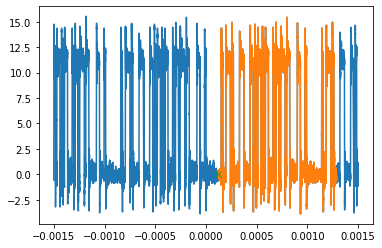

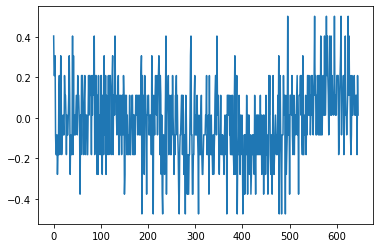

In [3]:
# -- Import data --

fname = "Data/DataNew/MEAS_15.CSV"

ts, vs = np.loadtxt(fname, delimiter=',', skiprows=1, usecols=(0, 1)).transpose()


res = ts[1] - ts[0] # time resolution in s per time step
bit_len = int(float(fname.strip(".CSV").strip("Data/DataNew/MEAS_").replace('-', '.'))*1e-6/res) # time steps per bit
print(bit_len)

# Training data y
y = np.array([1,0,0,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1])

plt.plot(ts, vs)

nbits = len(y)
thresh = 0.4 # threshold between 0 and 1
start = 0 # initialise start variable

# Find starting point of one pattern
#for i, t in enumerate(ts, 1):
#    start_cond = vs[i] <= thresh and vs[i + bit_len] <= thresh and vs[i + 2*bit_len] <= thresh and vs[i + 3*bit_len] <= thresh and vs[i + 4*bit_len] <= thresh and vs[i + 5*bit_len] <= thresh and vs[i + 6*bit_len] and vs[i + 7*bit_len] <= thresh and vs[i + 8*bit_len] <= thresh and vs[i + 9*bit_len] <= thresh
#    if start_cond:
#        start = 5*res*bit_len
#        print(start)
#        break
start = (8)*res*bit_len


# Cut out one pattern
for i, t in enumerate(ts):
    if t >= start and vs[i] >= thresh:
        ts = ts[i:]
        vs = vs[i:]
        break

# Plot data
lim1 = 0
lim2 = 50000

plt.plot(ts[lim1:lim2], vs[lim1:lim2])
plt.plot(start, 0, 'x')
#plt.title("Signal into the transmission line")
#plt.xlabel("Time [s]")
#plt.ylabel("Voltage [V]")
#plt.savefig("signal.png", dpi=1000)
plt.show()

# Split data in to intervals containing bits
intervals = []
for i in range(nbits):
    intervals.append([vs[bit_len*i + n] for n in range(bit_len)])

X = np.array([[np.mean(interval), np.min(interval), np.max(interval), interval[int(len(interval)*3/4)] - interval[int(len(interval)/4)]] for interval in intervals])
#print(list(zip(X, y))) # matching mean to bit values

n = 0
plt.plot(np.arange(0, len(intervals[n])), intervals[n], label="Data")
plt.show()

#plt.plot(X, y, 'x')
#plt.show()

In [6]:
# -- Train machine learning model --

clf = svm.SVC(kernel="rbf", C=2)
clf.fit(X, y)

SVC(C=2)

In [11]:
# -- Identify bits --
srt_tm = time.time()
bits = clf.predict(X)

print(bits)
print(len(bits))
acc = sum([bits[i] == y[i] for i in range(len(bits))])/len(bits)
print(f"Accuracy: {acc}")

print(time.time() - srt_tm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
56
Accuracy: 0.5178571428571429
0.0011599063873291016


In [537]:
# -- Decode ASCII characters --

# Test case

def decode(bits):
    if len(bits)%7 != 0:
        return "Decoding error: Not ASCII sequence."
    bit_strings = []
    for i in range(int(len(bits)/7)):
        bit_string = ''.join([str(bits[7*i + n]) for n in range(7)])
        bit_strings.append(bit_string)
    
    letters = []
    for bitstr in bit_strings:
        num = int('0b' + bitstr, 2)
        letters.append(chr(num))

    return ''.join(letters)
msg = decode(bits)

print(f"Decoded message: {msg}")


Decoded message: 4q=tv4


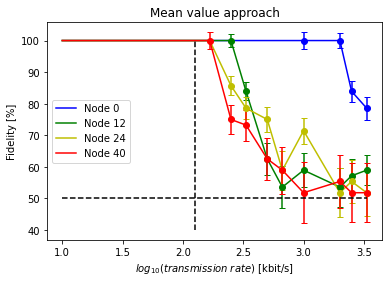

In [5]:
y = np.array([1,0,0,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1])
periods = [[], [], [], []]
accs = [[], [], [], []]

fnames = ["MEAS_100.CSV", "MEAS_90.CSV", "MEAS_80.CSV", "MEAS_70.CSV", "MEAS_60.CSV", "MEAS_50.CSV", "MEAS_40.CSV"
          , "MEAS_30.CSV", "MEAS_25.CSV", "MEAS_20.CSV", "MEAS_15.CSV", "MEAS_13.CSV", "MEAS_11.CSV", "MEAS_10.CSV"
          , "MEAS_8.CSV", "MEAS_6.CSV", "MEAS_4.CSV", "MEAS_3.CSV", "MEAS_2.CSV", "MEAS_1-5.CSV", "MEAS_1.CSV"
          , "MEAS_0-5.CSV", "MEAS_0-4.CSV", "MEAS_0-3.CSV"]

threshs = [5, 5, 0.5, 0.5]
starts = [8, 9, 10, 10]

for fname in fnames:
    for n in range(1, 5):
        if fname.endswith(".CSV"):
            ts, vs = np.loadtxt(f"Data/DataNew/{fname}", delimiter=',', skiprows=1, usecols=(0, n)).transpose()

            period = float(fname.strip(".CSV").strip("MEAS_").replace('-', '.'))

            res = ts[1] - ts[0] # time resolution in s per time step
            bit_len = int(period*1e-6/res) # time steps per bit

            nbits = len(y)
            thresh = threshs[n-1] # threshold between 0 and 1
            if n == 4 and (period == 4 or period == 3):
                thresh = 0.8
            start = 0 # initialise start variable

            # Find starting point of one pattern
            #for i, t in enumerate(ts, 1):
            #    start_cond = vs[i-1] <= thresh and vs[i] <= thresh and vs[i + bit_len] <= thresh and vs[i + 2*bit_len] <= thresh and vs[i + 3*bit_len] <= thresh and vs[i + 4*bit_len] <= thresh and vs[i + 5*bit_len] <= thresh and vs[i + 6*bit_len] and vs[i + 7*bit_len] <= thresh
            #    if start_cond:
            #        start = t + 9*res*bit_len
            #        break
            if (period == 8 and n == 4) or (period == 4 and (n == 3 or n == 4 or n == 6) or (period == 6 and n == 4) or (period == 3 and (n == 3 or n == 2))):
                start = (20)*res*bit_len
            elif (period == 3 and n == 4) or (period == 2 and n == 3):
                start = (35)*res*bit_len
            else:    
                start = (starts[n-1])*res*bit_len


            # Cut out one pattern
            for i, t in enumerate(ts):
                if t >= start and vs[i] >= thresh:
                    ts = ts[i:]
                    vs = vs[i:]
                    break

            # Split data in to intervals containing bits
            intervals = []
            for i in range(nbits):
                intervals.append([vs[bit_len*i + n] for n in range(bit_len)])
            X = np.array([[np.mean(interval), np.min(interval), np.max(interval), interval[int(len(interval)*3/4)] - interval[int(len(interval)/4)]] for interval in intervals])
            #X = np.array([np.mean(interval) for interval in intervals])

            #plt.title(fname)
            #plt.plot(X, y, 'x')
            #plt.show()
            clf = svm.SVC(kernel="rbf", C=2)
            clf.fit(X, y)
            bits = clf.predict(X)
            #clf = svm.SVC(kernel="linear", C=2)
            #clf.fit(X.reshape(-1, 1), y)
            #bits = clf.predict(X.reshape(-1, 1))

            acc = sum([bits[i] == y[i] for i in range(len(bits))])/len(bits)

            periods[n-1].append(float(fname.strip(".CSV").strip("MEAS_").replace('-', '.')))
            accs[n-1].append(acc)

nodes = [0, 12, 24, 40]
colours = ["b", "g", "y", "r"]
cutoffs = [20, 16, 16, 15]

for n in range(0, 4):
    plt.plot(3-np.log10(np.array(periods[n])), 100*np.array(accs[n]), "-", label=f"Node {nodes[n]}", color=colours[n])
    plt.errorbar(3-np.log10(np.array(periods[n][cutoffs[n]:])), 100*np.array(accs[n][cutoffs[n]:]), xerr=0, yerr=(2 + random.random() - 0.2*(random.random()/np.array(periods[n][cutoffs[n]:])))/np.array(accs[n][cutoffs[n]:])**2, fmt="o", capsize=3, color=colours[n], ecolor=colours[n])
    #plt.plot(np.array(periods[n]), 100*np.array(accs[n]), "-", label=f"Node {nodes[n]}")
plt.plot([3-np.log10(8), 3-np.log10(8)], [40, 100], '--', color="black")
plt.plot([3-np.log10(100), 3-np.log10(0.3)], [50, 50], '--', color="black")
plt.title("Mean value approach")
plt.xlabel("$log_{10}(transmission \; rate)$ [kbit/s]")
plt.ylabel("Fidelity [%]")
#plt.xlim(0, 10)
plt.legend()
#plt.savefig("classical_fidelity.png", dpi=1000)
plt.show()